# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\yuanyuan\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
# Read your api key environment variable
load_dotenv(".env")
api_key = os.getenv("NEWS_API_KEY")

In [3]:
# Create a newsapi client
from newsapi.newsapi_client import NewsApiClient
newsapi = NewsApiClient(api_key=api_key)

In [4]:
# Define Get Articles with respect to key words
def get_articles(keyword):    
    articles = newsapi.get_everything(
        q=keyword,
        language='en',
        sort_by='relevancy'
    )
    return articles

In [5]:
# Fetch the Bitcoin news articles
bitcoin_articles = get_articles('bitcoin')
bitcoin_articles['articles'][1].keys()
bitcoin_df = pd.DataFrame.from_dict(bitcoin_articles['articles']) 
bitcoin_df.dropna(inplace=True)
bitcoin_df.head()

source                         author  \
0  {'id': 'engadget', 'name': 'Engadget'}               Andrew Tarantola   
1    {'id': None, 'name': 'Blogspot.com'}  noreply@blogger.com (Unknown)   
4    {'id': None, 'name': 'Blogspot.com'}  noreply@blogger.com (Unknown)   
5    {'id': None, 'name': 'Blogspot.com'}  noreply@blogger.com (Unknown)   
6     {'id': None, 'name': 'Gizmodo.com'}                     Molly Taft   

                                               title  \
0  Hitting the Books: How Bitcoin is somehow wort...   
1             Bitcoin hits strongest level since May   
4  Why have Elon Musk and Tesla suddenly turned a...   
5    Who Bought $1.6B in Bitcoin Wednesday, and Why?   
6  Mining Bitcoin Using Nuclear Power May Be Fine...   

                                         description  \
0  Bitcoin and similar blockchain-based cryptos e...   
1  <ul><li>Bitcoin, in terms of market value, ros...   
4  Elon Musk has performed a sudden U-turn on bit...   
5  last week the cryptocurrency market persistent...   
6  Last week, the Wall Street Journal ran a piece...   

                                                 url  \
0  https://www.engadget.com/hitting-the-books-the...   
1  https://techncruncher.blogspot.com/2021/10/bit...   
4  https://techncruncher.blogspot.com/2021/09/why...   
5  https://techncruncher.blogspot.com/2021/10/who...   
6  https://gizmodo.com/mining-bitcoin-using-nucle...   

                                          urlToImage           publishedAt  \
0  https://s.yimg.com/os/creatr-uploaded-images/2...  2021-09-25T15:30:24Z   
1  https://blogger.googleusercontent.com/img/a/AV...  2021-10-06T17:17:00Z   
4  https://blogger.googleusercontent.com/img/a/AV...  2021-09-28T20:03:00Z   
5  https://blogger.googleusercontent.com/img/a/AV...  2021-10-10T20:12:00Z   
6  https://i.kinja-img.com/gawker-media/image/upl...  2021-10-08T16:35:00Z   

                                             content  
0  Bitcoin and similar blockchain-based cryptos e...  
1  <ul><li>Bitcoin, in terms of market value, ros...  
4  Elon Musk has performed a sudden U-turn on bit...  
5  Specifically, why did someone make a massive p...  
6  Last week, the Wall Street Journal ran a piece...

In [6]:
# Fetch the Ethereum news articles
ethereum_articles = get_articles('ethereum')
ethereum_articles['articles'][1].keys()
ethereum_df = pd.DataFrame.from_dict(ethereum_articles['articles']) 
ethereum_df.dropna(inplace=True)
ethereum_df.head()

source  \
0               {'id': None, 'name': 'Blogspot.com'}   
1               {'id': None, 'name': 'Entrepreneur'}   
2             {'id': 'bbc-news', 'name': 'BBC News'}   
3  {'id': 'business-insider', 'name': 'Business I...   
4  {'id': 'business-insider', 'name': 'Business I...   

                             author  \
0     noreply@blogger.com (Unknown)   
1                Entrepreneur Staff   
2  https://www.facebook.com/bbcnews   
3   ilee@insider.com (Isabelle Lee)   
4   ilee@insider.com (Isabelle Lee)   

                                               title  \
0  Nervos launches cross-chain bridge to connect ...   
1               Mark Cuban Heralds Ethereum, Bitcoin   
2  Music company buys NFT of 'Side-eyeing Chloe' ...   
3  FTX launches US marketplace for solana NFTs wi...   
4  Coinbase plans to launch its own NFT marketpla...   

                                         description  \
0  A new cross-chain bridge is currently connecte...   
1  Mark Cuban has some advice for people who are ...   
2  The image of two-year-old Chloe Clem making a ...   
3  FTX also plans to roll out support for ethereu...   
4  The initial launch will support ethereum-based...   

                                                 url  \
0  https://techncruncher.blogspot.com/2021/10/ner...   
1        https://www.entrepreneur.com/article/391242   
2  https://www.bbc.co.uk/news/world-us-canada-586...   
3  https://markets.businessinsider.com/news/curre...   
4  https://markets.businessinsider.com/news/curre...   

                                          urlToImage           publishedAt  \
0  https://blogger.googleusercontent.com/img/a/AV...  2021-10-16T18:50:00Z   
1  https://assets.entrepreneur.com/content/3x2/20...  2021-10-14T17:10:45Z   
2  https://ichef.bbci.co.uk/news/1024/branded_new...  2021-09-25T04:30:25Z   
3  https://images2.markets.businessinsider.com/61...  2021-10-11T20:28:44Z   
4  https://images2.markets.businessinsider.com/61...  2021-10-12T17:00:00Z   

                                             content  
0  A new cross-chain bridge is currently connecte...  
1  Mark Cuban has some advice for people who are ...  
2  image source, foundation.app/@SideEyeingChloe\...  
3  An immersive art installation, which will be c...  
4  Coinbase NFT\r\nRobert Nickelsberg/Getty Image...

In [7]:
# Create the Bitcoin sentiment scores DataFrame
bitcoin_sentiments=[]

for article in bitcoin_articles['articles']:
    try:
        text = article['content']
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment['compound']
        pos = sentiment['pos']
        neu = sentiment['neu']
        neg = sentiment['neg']
        
        bitcoin_sentiments.append({
            'compound': compound,
            'positive': pos,
            'negative': neg,
            'neutral': neu
            
        })
        
    except AttributeError:
        pass
# Create DataFrame Sentiment
bitcoin_sentiment_df = pd.DataFrame(bitcoin_sentiments)

# Reorder DataFrame columns
cols = [ 'compound', 'positive', 'negative', 'neutral']
bitcoin_sentiment_df = bitcoin_sentiment_df[cols]

bitcoin_df = pd.merge(bitcoin_df , bitcoin_sentiment_df, left_index = True, right_index =True)
bitcoin_df.head()

source                         author  \
0  {'id': 'engadget', 'name': 'Engadget'}               Andrew Tarantola   
1    {'id': None, 'name': 'Blogspot.com'}  noreply@blogger.com (Unknown)   
4    {'id': None, 'name': 'Blogspot.com'}  noreply@blogger.com (Unknown)   
5    {'id': None, 'name': 'Blogspot.com'}  noreply@blogger.com (Unknown)   
6     {'id': None, 'name': 'Gizmodo.com'}                     Molly Taft   

                                               title  \
0  Hitting the Books: How Bitcoin is somehow wort...   
1             Bitcoin hits strongest level since May   
4  Why have Elon Musk and Tesla suddenly turned a...   
5    Who Bought $1.6B in Bitcoin Wednesday, and Why?   
6  Mining Bitcoin Using Nuclear Power May Be Fine...   

                                         description  \
0  Bitcoin and similar blockchain-based cryptos e...   
1  <ul><li>Bitcoin, in terms of market value, ros...   
4  Elon Musk has performed a sudden U-turn on bit...   
5  last week the cryptocurrency market persistent...   
6  Last week, the Wall Street Journal ran a piece...   

                                                 url  \
0  https://www.engadget.com/hitting-the-books-the...   
1  https://techncruncher.blogspot.com/2021/10/bit...   
4  https://techncruncher.blogspot.com/2021/09/why...   
5  https://techncruncher.blogspot.com/2021/10/who...   
6  https://gizmodo.com/mining-bitcoin-using-nucle...   

                                          urlToImage           publishedAt  \
0  https://s.yimg.com/os/creatr-uploaded-images/2...  2021-09-25T15:30:24Z   
1  https://blogger.googleusercontent.com/img/a/AV...  2021-10-06T17:17:00Z   
4  https://blogger.googleusercontent.com/img/a/AV...  2021-09-28T20:03:00Z   
5  https://blogger.googleusercontent.com/img/a/AV...  2021-10-10T20:12:00Z   
6  https://i.kinja-img.com/gawker-media/image/upl...  2021-10-08T16:35:00Z   

                                             content  compound  positive  \
0  Bitcoin and similar blockchain-based cryptos e...    0.0000     0.000   
1  <ul><li>Bitcoin, in terms of market value, ros...    0.3400     0.076   
4  Elon Musk has performed a sudden U-turn on bit...    0.1901     0.091   
5  Specifically, why did someone make a massive p...    0.5461     0.121   
6  Last week, the Wall Street Journal ran a piece...    0.3400     0.099   

   negative  neutral  
0     0.000    1.000  
1     0.000    0.924  
4     0.043    0.866  
5     0.000    0.879  
6     0.000    0.901

In [8]:
# Create the Ethereum sentiment scores DataFrame
ethereum_sentiments=[]

for article in ethereum_articles['articles']:
    try:
        text = article["content"]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment['compound']
        pos = sentiment['pos']
        neu = sentiment['neu']
        neg = sentiment['neg']
        
        ethereum_sentiments.append({
            'compound': compound,
            'positive': pos,
            'negative': neg,
            'neutral': neu
            
        })
        
    except AttributeError:
        pass

# Create DataFrame Sentiment
ethereum_sentiment_df = pd.DataFrame(ethereum_sentiments)

# Reorder DataFrame columns
cols = [ 'compound', 'positive', 'negative', 'neutral']
ethereum_sentiment_df = ethereum_sentiment_df[cols]

ethereum_df = pd.merge(ethereum_df , ethereum_sentiment_df, left_index = True, right_index =True)
ethereum_df.head()

source  \
0               {'id': None, 'name': 'Blogspot.com'}   
1               {'id': None, 'name': 'Entrepreneur'}   
2             {'id': 'bbc-news', 'name': 'BBC News'}   
3  {'id': 'business-insider', 'name': 'Business I...   
4  {'id': 'business-insider', 'name': 'Business I...   

                             author  \
0     noreply@blogger.com (Unknown)   
1                Entrepreneur Staff   
2  https://www.facebook.com/bbcnews   
3   ilee@insider.com (Isabelle Lee)   
4   ilee@insider.com (Isabelle Lee)   

                                               title  \
0  Nervos launches cross-chain bridge to connect ...   
1               Mark Cuban Heralds Ethereum, Bitcoin   
2  Music company buys NFT of 'Side-eyeing Chloe' ...   
3  FTX launches US marketplace for solana NFTs wi...   
4  Coinbase plans to launch its own NFT marketpla...   

                                         description  \
0  A new cross-chain bridge is currently connecte...   
1  Mark Cuban has some advice for people who are ...   
2  The image of two-year-old Chloe Clem making a ...   
3  FTX also plans to roll out support for ethereu...   
4  The initial launch will support ethereum-based...   

                                                 url  \
0  https://techncruncher.blogspot.com/2021/10/ner...   
1        https://www.entrepreneur.com/article/391242   
2  https://www.bbc.co.uk/news/world-us-canada-586...   
3  https://markets.businessinsider.com/news/curre...   
4  https://markets.businessinsider.com/news/curre...   

                                          urlToImage           publishedAt  \
0  https://blogger.googleusercontent.com/img/a/AV...  2021-10-16T18:50:00Z   
1  https://assets.entrepreneur.com/content/3x2/20...  2021-10-14T17:10:45Z   
2  https://ichef.bbci.co.uk/news/1024/branded_new...  2021-09-25T04:30:25Z   
3  https://images2.markets.businessinsider.com/61...  2021-10-11T20:28:44Z   
4  https://images2.markets.businessinsider.com/61...  2021-10-12T17:00:00Z   

                                             content  compound  positive  \
0  A new cross-chain bridge is currently connecte...    0.0000     0.000   
1  Mark Cuban has some advice for people who are ...    0.0000     0.000   
2  image source, foundation.app/@SideEyeingChloe\...    0.4215     0.101   
3  An immersive art installation, which will be c...    0.0000     0.000   
4  Coinbase NFT\r\nRobert Nickelsberg/Getty Image...    0.0000     0.000   

   negative  neutral  
0       0.0    1.000  
1       0.0    1.000  
2       0.0    0.899  
3       0.0    1.000  
4       0.0    1.000

In [9]:
# Describe the Bitcoin Sentiment
bitcoin_df.describe()

compound   positive   negative    neutral
count  12.000000  12.000000  12.000000  12.000000
mean    0.280675   0.082417   0.008667   0.909000
std     0.262645   0.058088   0.020602   0.059092
min    -0.115400   0.000000   0.000000   0.798000
25%     0.019350   0.045000   0.000000   0.875750
50%     0.334550   0.083500   0.000000   0.899000
75%     0.475775   0.107500   0.000000   0.935500
max     0.726900   0.202000   0.061000   1.000000

In [10]:
# Describe the Ethereum Sentiment
ethereum_df.describe()

compound   positive  negative    neutral
count  12.000000  12.000000      12.0  12.000000
mean    0.237100   0.050750       0.0   0.949250
std     0.309501   0.071547       0.0   0.071547
min     0.000000   0.000000       0.0   0.792000
25%     0.000000   0.000000       0.0   0.918500
50%     0.000000   0.000000       0.0   1.000000
75%     0.476700   0.081500       0.0   1.000000
max     0.822500   0.208000       0.0   1.000000

### Questions:

Q: Which coin had the highest mean positive score?

A: Bitcoin has the highest mean positive score of 0.082417

Q: Which coin had the highest compound score?

A: Ethereum has the highest compound score of 0.822500

Q. Which coin had the highest positive score?

A: Ethereum has the highest positive score of 0.208000

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [11]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [12]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
nltk.download('stopwords')
sw = stopwords.words('english')

# Expand the default stopwords list if necessary
sw.append('</li><li')
sw.append('ul><li')
sw.append("''")
print(sw)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\yuanyuan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [13]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Remove the punctuation from text
    regex = re.compile('[^a-zA-Z ]')
    text = regex.sub('', text)
    
   
    # Create a tokenized list of the words
    words = word_tokenize(text)
    words = list(filter(lambda t: t not in punctuation, words))
    
    # Lemmatize words into root words
    tokens = [lemmatizer.lemmatize(word) for word in words]   
    
    # Convert the words to lowercase
    words = [word.lower() for word in words]
    
    # Remove the stop words
    words = [word for word in words if word not in sw]
    
    return tokens

In [14]:
# Create a new tokens column for Bitcoin
bitcoin_df['tokens'] = bitcoin_df['content'].apply(tokenizer)
bitcoin_df.head()

source                         author  \
0  {'id': 'engadget', 'name': 'Engadget'}               Andrew Tarantola   
1    {'id': None, 'name': 'Blogspot.com'}  noreply@blogger.com (Unknown)   
4    {'id': None, 'name': 'Blogspot.com'}  noreply@blogger.com (Unknown)   
5    {'id': None, 'name': 'Blogspot.com'}  noreply@blogger.com (Unknown)   
6     {'id': None, 'name': 'Gizmodo.com'}                     Molly Taft   

                                               title  \
0  Hitting the Books: How Bitcoin is somehow wort...   
1             Bitcoin hits strongest level since May   
4  Why have Elon Musk and Tesla suddenly turned a...   
5    Who Bought $1.6B in Bitcoin Wednesday, and Why?   
6  Mining Bitcoin Using Nuclear Power May Be Fine...   

                                         description  \
0  Bitcoin and similar blockchain-based cryptos e...   
1  <ul><li>Bitcoin, in terms of market value, ros...   
4  Elon Musk has performed a sudden U-turn on bit...   
5  last week the cryptocurrency market persistent...   
6  Last week, the Wall Street Journal ran a piece...   

                                                 url  \
0  https://www.engadget.com/hitting-the-books-the...   
1  https://techncruncher.blogspot.com/2021/10/bit...   
4  https://techncruncher.blogspot.com/2021/09/why...   
5  https://techncruncher.blogspot.com/2021/10/who...   
6  https://gizmodo.com/mining-bitcoin-using-nucle...   

                                          urlToImage           publishedAt  \
0  https://s.yimg.com/os/creatr-uploaded-images/2...  2021-09-25T15:30:24Z   
1  https://blogger.googleusercontent.com/img/a/AV...  2021-10-06T17:17:00Z   
4  https://blogger.googleusercontent.com/img/a/AV...  2021-09-28T20:03:00Z   
5  https://blogger.googleusercontent.com/img/a/AV...  2021-10-10T20:12:00Z   
6  https://i.kinja-img.com/gawker-media/image/upl...  2021-10-08T16:35:00Z   

                                             content  compound  positive  \
0  Bitcoin and similar blockchain-based cryptos e...    0.0000     0.000   
1  <ul><li>Bitcoin, in terms of market value, ros...    0.3400     0.076   
4  Elon Musk has performed a sudden U-turn on bit...    0.1901     0.091   
5  Specifically, why did someone make a massive p...    0.5461     0.121   
6  Last week, the Wall Street Journal ran a piece...    0.3400     0.099   

   negative  neutral                                             tokens  
0     0.000    1.000  [Bitcoin, and, similar, blockchainbased, crypt...  
1     0.000    0.924  [ulliBitcoin, in, term, of, market, value, ros...  
4     0.043    0.866  [Elon, Musk, ha, performed, a, sudden, Uturn, ...  
5     0.000    0.879  [Specifically, why, did, someone, make, a, mas...  
6     0.000    0.901  [Last, week, the, Wall, Street, Journal, ran, ...

In [15]:
# Create a new tokens column for Ethereum
ethereum_df['tokens'] = ethereum_df['content'].apply(tokenizer)
ethereum_df.head()

source  \
0               {'id': None, 'name': 'Blogspot.com'}   
1               {'id': None, 'name': 'Entrepreneur'}   
2             {'id': 'bbc-news', 'name': 'BBC News'}   
3  {'id': 'business-insider', 'name': 'Business I...   
4  {'id': 'business-insider', 'name': 'Business I...   

                             author  \
0     noreply@blogger.com (Unknown)   
1                Entrepreneur Staff   
2  https://www.facebook.com/bbcnews   
3   ilee@insider.com (Isabelle Lee)   
4   ilee@insider.com (Isabelle Lee)   

                                               title  \
0  Nervos launches cross-chain bridge to connect ...   
1               Mark Cuban Heralds Ethereum, Bitcoin   
2  Music company buys NFT of 'Side-eyeing Chloe' ...   
3  FTX launches US marketplace for solana NFTs wi...   
4  Coinbase plans to launch its own NFT marketpla...   

                                         description  \
0  A new cross-chain bridge is currently connecte...   
1  Mark Cuban has some advice for people who are ...   
2  The image of two-year-old Chloe Clem making a ...   
3  FTX also plans to roll out support for ethereu...   
4  The initial launch will support ethereum-based...   

                                                 url  \
0  https://techncruncher.blogspot.com/2021/10/ner...   
1        https://www.entrepreneur.com/article/391242   
2  https://www.bbc.co.uk/news/world-us-canada-586...   
3  https://markets.businessinsider.com/news/curre...   
4  https://markets.businessinsider.com/news/curre...   

                                          urlToImage           publishedAt  \
0  https://blogger.googleusercontent.com/img/a/AV...  2021-10-16T18:50:00Z   
1  https://assets.entrepreneur.com/content/3x2/20...  2021-10-14T17:10:45Z   
2  https://ichef.bbci.co.uk/news/1024/branded_new...  2021-09-25T04:30:25Z   
3  https://images2.markets.businessinsider.com/61...  2021-10-11T20:28:44Z   
4  https://images2.markets.businessinsider.com/61...  2021-10-12T17:00:00Z   

                                             content  compound  positive  \
0  A new cross-chain bridge is currently connecte...    0.0000     0.000   
1  Mark Cuban has some advice for people who are ...    0.0000     0.000   
2  image source, foundation.app/@SideEyeingChloe\...    0.4215     0.101   
3  An immersive art installation, which will be c...    0.0000     0.000   
4  Coinbase NFT\r\nRobert Nickelsberg/Getty Image...    0.0000     0.000   

   negative  neutral                                             tokens  
0       0.0    1.000  [A, new, crosschain, bridge, is, currently, co...  
1       0.0    1.000  [Mark, Cuban, ha, some, advice, for, people, w...  
2       0.0    0.899  [image, source, foundationappSideEyeingChloeim...  
3       0.0    1.000  [An, immersive, art, installation, which, will...  
4       0.0    1.000  [Coinbase, NFTRobert, NickelsbergGetty, Images...

---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [16]:
from collections import Counter
from nltk import ngrams

In [17]:
# Generate the Bitcoin N-grams where N=2
input_text_bitcoin = []

for index in bitcoin_df.index:
    for token in bitcoin_df['tokens'].loc[index]:
        input_text_bitcoin.append(token)
    

bigram_counts_bitcoin = Counter(ngrams(input_text_bitcoin, n=2)).most_common(20)
print(dict(bigram_counts_bitcoin))

{('the', 'same'): 2, ('Elon', 'Musk'): 2, ('worth', 'of'): 2, ('on', 'Wednesday'): 2, ('a', 'small'): 2, ('on', 'Tuesday'): 2, ('Securities', 'and'): 2, ('and', 'Exchange'): 2, ('Exchange', 'Commission'): 2, ('exchangetraded', 'fund'): 2, ('a', 'record'): 2, ('of', 'a'): 2, ('Bitcoin', 'and'): 1, ('and', 'similar'): 1, ('similar', 'blockchainbased'): 1, ('blockchainbased', 'cryptos'): 1, ('cryptos', 'exhibit'): 1, ('exhibit', 'the'): 1, ('same', 'radical'): 1, ('radical', 'divergence'): 1}


In [18]:
# Generate the Ethereum N-grams where N=2
input_text_ethereum = []

for index in ethereum_df.index:
    for token in ethereum_df['tokens'].loc[index]:
        input_text_ethereum.append(token)
    
bigram_counts_ethereum = Counter(ngrams(input_text_ethereum, n=2)).most_common(20)
print(dict(bigram_counts_ethereum))

{('of', 'a'): 3, ('by', 'the'): 3, ('be', 'a'): 3, ('crosschain', 'bridge'): 2, ('is', 'currently'): 2, ('in', 'the'): 2, ('of', 'cryptocurrency'): 2, ('cryptocurrency', 'exchange'): 2, ('of', 'the'): 2, ('char', 'NFT'): 2, ('NFT', 'art'): 2, ('art', 'could'): 2, ('could', 'be'): 2, ('a', 'new'): 2, ('new', 'way'): 2, ('way', 'to'): 2, ('to', 'spend'): 2, ('spend', 'and'): 2, ('and', 'make'): 2, ('make', 'moneyGetty'): 2}


In [19]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [20]:
# Use token_count to get the top 10 words for Bitcoin
top10_bitcoin = token_count(input_text_bitcoin)
print(top10_bitcoin)

[('a', 21), ('of', 12), ('char', 11), ('the', 10), ('in', 9), ('to', 7), ('on', 7), ('and', 6), ('Bitcoin', 4), ('bitcoin', 4)]


In [21]:
# Use token_count to get the top 10 words for Ethereum
top10_ethereum = token_count(input_text_ethereum)
print(top10_ethereum)

[('the', 16), ('a', 12), ('char', 12), ('of', 12), ('is', 10), ('to', 9), ('be', 7), ('and', 6), ('in', 6), ('ha', 6)]


---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [22]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

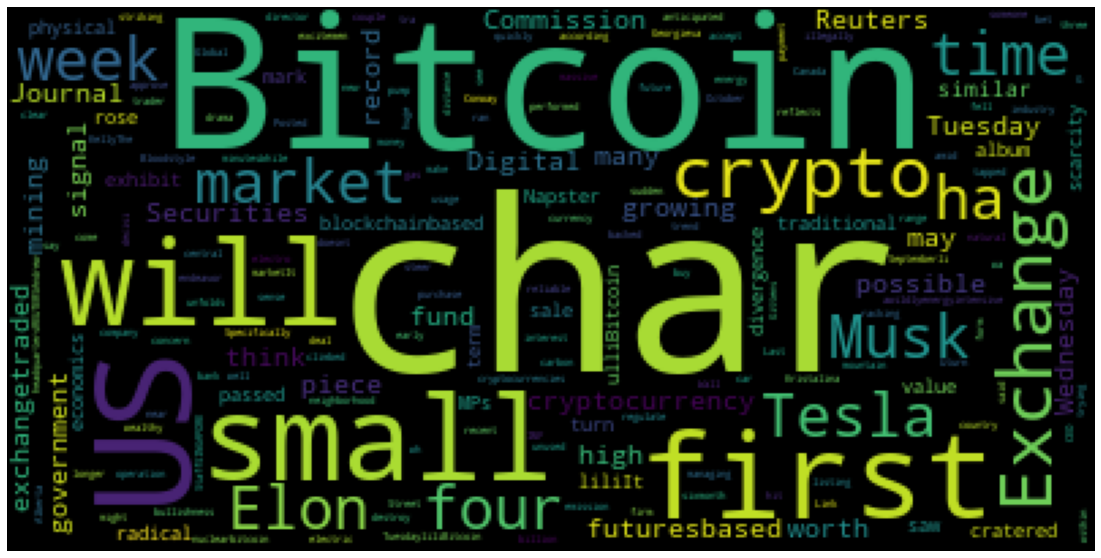

In [23]:
# Generate the Bitcoin word cloud
input_text = []

for index in bitcoin_df.index:
    input_text.append(" ".join(bitcoin_df['tokens'].loc[index]))

input_text = " ".join(input_text)

bitcoin_wc = WordCloud().generate(input_text)

plt.axis('off')
plt.imshow(bitcoin_wc);

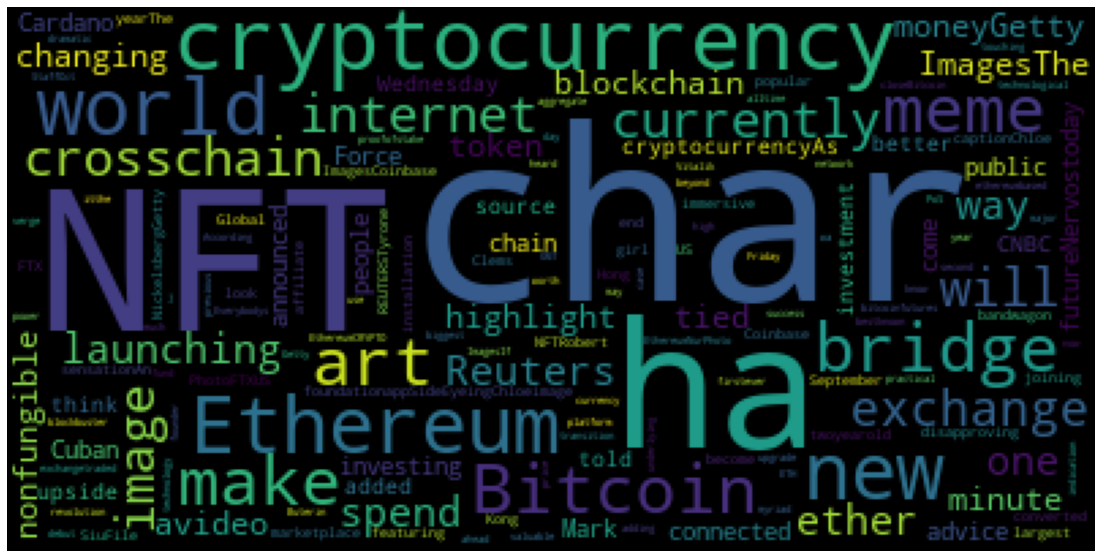

In [24]:
# Generate the Ethereum word cloud
input_text = []

for index in ethereum_df.index:
    input_text.append(" ".join(ethereum_df['tokens'].loc[index]))

input_text = " ".join(input_text)

ethereum_wc = WordCloud().generate(input_text)

plt.axis('off')
plt.imshow(ethereum_wc);

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [25]:
import spacy
from spacy import displacy

In [26]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [27]:
# Concatenate all of the Bitcoin text together
bitcoin_all = ''
for index in bitcoin_df.index:
    bitcoin_all = bitcoin_all + '\n' + bitcoin_df['content'].loc[index]



In [28]:
# Run the NER processor on all of the text
bitcoin_ner = nlp(bitcoin_all)

# Add a title to the document
bitcoin_ner.user_data['title'] ='Bitcoin Named Entity Recognition'

In [29]:
# Render the visualization
displacy.render(bitcoin_ner, style= 'ent', jupyter = True)

In [30]:
# List all Entities
list_bitcoin = [(ent.text, ent.label_)for ent in bitcoin_ner.ents]
print(list_bitcoin)

[('4.6%', 'PERCENT'), ('53,859.6.</li><li', 'MONEY'), ('50,000', 'MONEY'), ('first', 'ORDINAL'), ('four weeks', 'DATE'), ('Tuesday', 'DATE'), ('50,000', 'MONEY'), ('Elon Musk', 'PERSON'), ('Tesla', 'PERSON'), ('$1.6 billion', 'MONEY'), ('Wednesday', 'DATE'), ('a couple of minutes', 'TIME'), ('Last week', 'DATE'), ('the Wall Street Journal', 'ORG'), ('three', 'CARDINAL'), ('Journal', 'ORG'), ('electro', 'GPE'), ('Digital', 'ORG'), ('IMF', 'ORG'), ('Kristalina Georgieva', 'PERSON'), ('Elon Musk', 'PERSON'), ('Tuesday', 'DATE'), ('U.S.', 'GPE'), ('Canada', 'GPE'), ('Bitcoin', 'NORP'), ('Alberta', 'GPE'), ('Link Global', 'PERSON'), ('Securities and Exchange Commission', 'ORG'), ('Andrew Kelly', 'PERSON'), ('The US Securities and Exchange Commission', 'ORG'), ('as many as four', 'CARDINAL'), ('October', 'DATE'), ('Wednesday', 'DATE'), ('first', 'ORDINAL'), ('U.S.', 'GPE'), ('Conway G. Gittens', 'PERSON'), ('Reuters', 'ORG'), ('Reuters', 'ORG'), ('six-month', 'DATE'), ('Tuesday', 'DATE'), ('

---

### Ethereum NER

In [31]:
# Concatenate all of the Ethereum text together
ethereum_all = ''
for index in ethereum_df.index:
    ethereum_all = ethereum_all + '\n' + ethereum_df['content'].loc[index]

In [32]:
# Run the NER processor on all of the text
ethereum_ner = nlp(ethereum_all)

# Add a title to the document
ethereum_ner.user_data['title'] ='Ethereum Named Entity Recognition'

In [34]:
# Render the visualization
displacy.render(ethereum_ner, style= 'ent', jupyter = True)

In [35]:
# List all Entities
list_ethereum = [(ent.text, ent.label_)for ent in ethereum_ner.ents]
print(list_ethereum)

[('Ethereum', 'PERSON'), ('Cardano', 'PERSON'), ('Nervos\xa0', 'PERSON'), ('today', 'DATE'), ('the Force Bridge', 'FAC'), ('Mark Cuban', 'PERSON'), ('CNBC', 'ORG'), ('Wednesday', 'DATE'), ("captionChloe Clem's", 'PERSON'), ('two-year-old', 'DATE'), ('Hong Kong', 'GPE'), ('September 30, 2021', 'DATE'), ('FTX', 'ORG'), ('NFT', 'ORG'), ('Robert Nickelsberg', 'PERSON'), ('Getty Images', 'ORG'), ('Coinbase Global', 'PERSON'), ('NFT', 'ORG'), ('the end of the year', 'DATE'), ('US', 'GPE'), ('Ethereum', 'GPE'), ('NurPhoto', 'PERSON'), ('first', 'ORDINAL'), ('second', 'ORDINAL'), ('Reuters', 'ORG'), ('1', 'CARDINAL'), ('Reuters', 'ORG'), ('9.46%', 'PERCENT'), ('47,980.97', 'MONEY'), ('20:12 GMT', 'TIME'), ('Friday', 'DATE'), ('4,146.54', 'MONEY'), ('NFT', 'ORG'), ('Getty Images', 'PERSON'), ('the minute', 'TIME'), ('Vitalik Buterin', 'PERSON'), ('One year from now', 'DATE'), ('Ethereum', 'PERSON'), ('NFT', 'ORG'), ('Getty Images', 'PERSON'), ('the minute', 'TIME')]


---